# Supervised Learning

There are two major types of supervised machine learning problems, called **classification** and **regression**

In classification, the goal is to **predict a class label**, which is a choice from a predefined
list of possibilities. Classification is sometimes separated into binary classification,
which is the special case of distinguishing between exactly two classes, and multiclass
classification, which is classification between more than two classes.

For regression tasks, the goal is to predict a **continuous number**, or a floating-point number in programming terms

If a model is able to make accurate predictions on unseen data, we say it is able to **generalize** from the training set to the test set.

The only measure of whether an algorithm will perform well on new data is the **evaluation** on the test set.

Building a model that is too complex for the amount of information we have, as our novice data scientist did, is called **overfitting**. Overfitting occurs when you fit a model too closely to the particularities of the training set and obtain a model that works well on the training set but is not able to generalize to new data.

Choosing too simple a model is called **underfitting**.



### Some Sample Datasets

In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

X.shape: (26, 2)


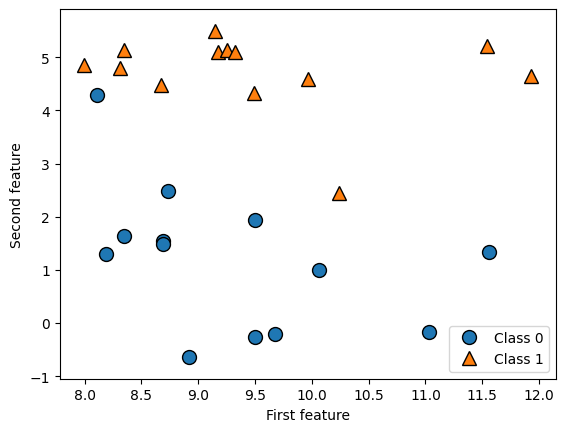

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

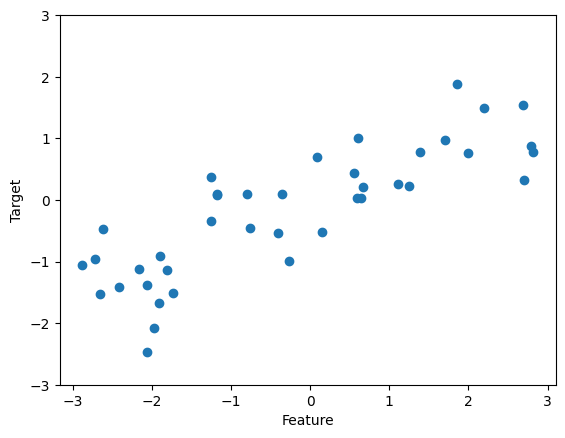

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

**Wisconsin Breast Cancer** dataset (cancer,
for short), which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to **predict whether a tumor is malignant based on the measurements of the tissue**

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## K-Nearest Neighbors

Simple ML algorithm. Building the model consists only of storing the training dataset.

To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

#### Classification

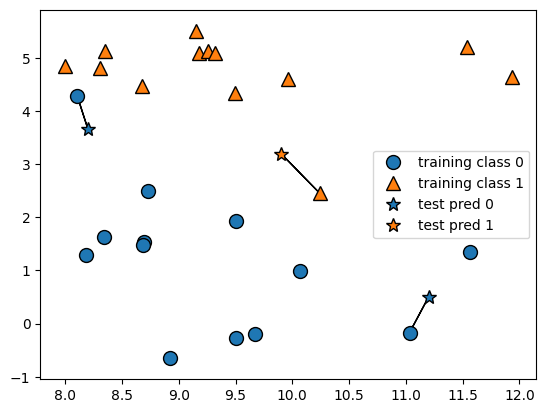

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
# Fitting
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Predict
print("Test set predictions: {}".format(clf.predict(X_test)))
#acuracy
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


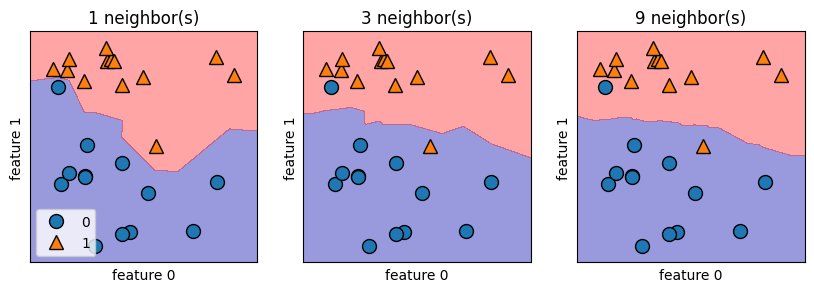

In [23]:
# Plotting Boundaries
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Considering more and more neighbors
leads to a **smoother decision boundary**. A smoother boundary corresponds to a
**simpler model**.
In other words, using **few neighbors** corresponds to **high model complexity**

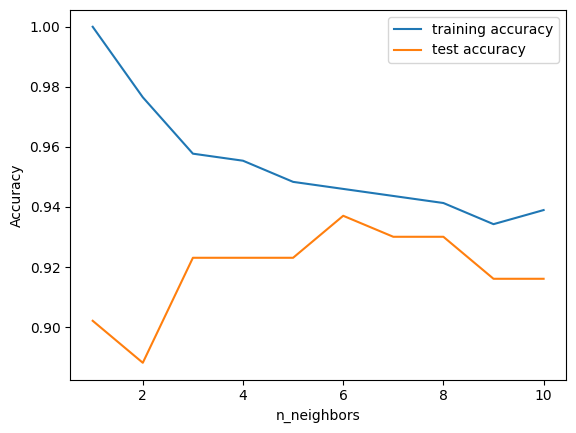

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Regression

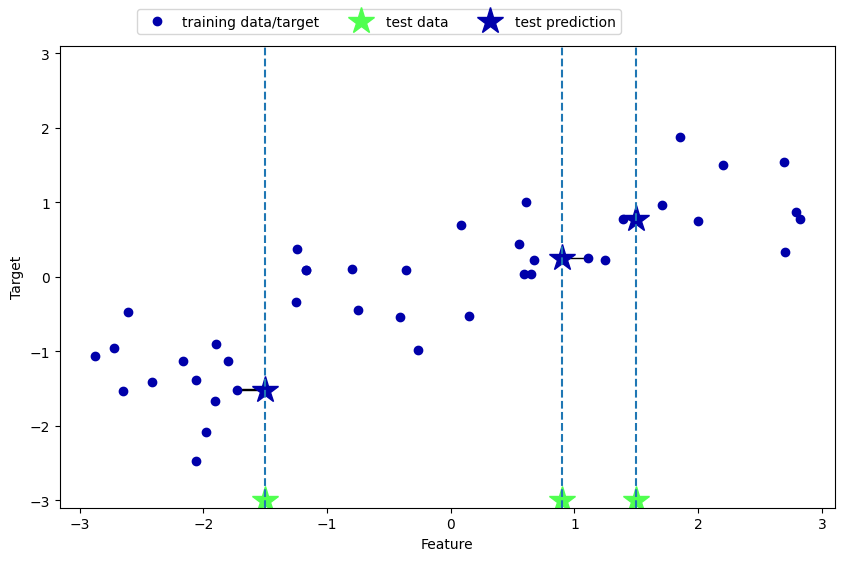

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

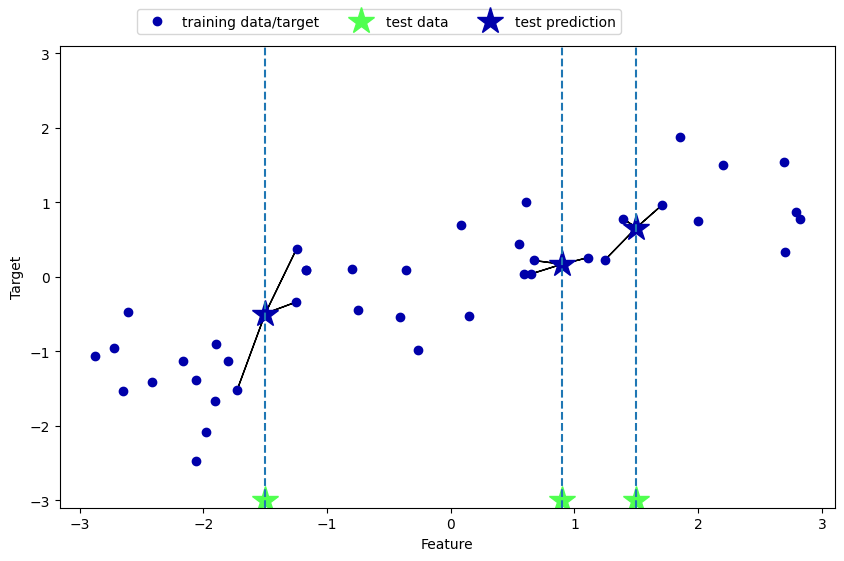

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


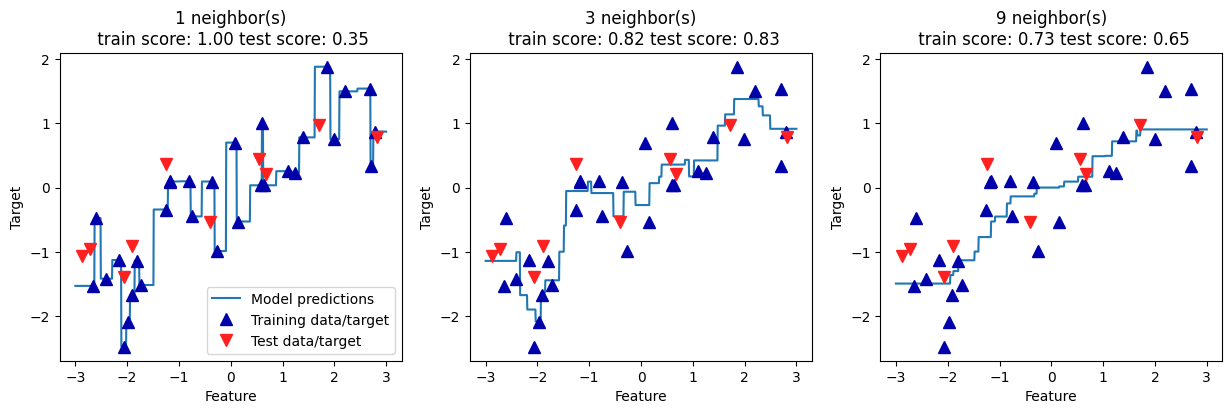

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")

In principle, there are two important parameters to the KNeighbors classifier: **the number of neighbors and how you measure distance between data points**

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques.

When using the k-NN algorithm, it’s important to **preprocess your data**

This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

## Linear Models

Widely used in practice. Linear models make a prediction using a **linear function** of the input features,

### Regression
Formula : y=w[0]*x[0]+..+w[p]*x[p]+b

w[0]: 0.393906  b: -0.031804


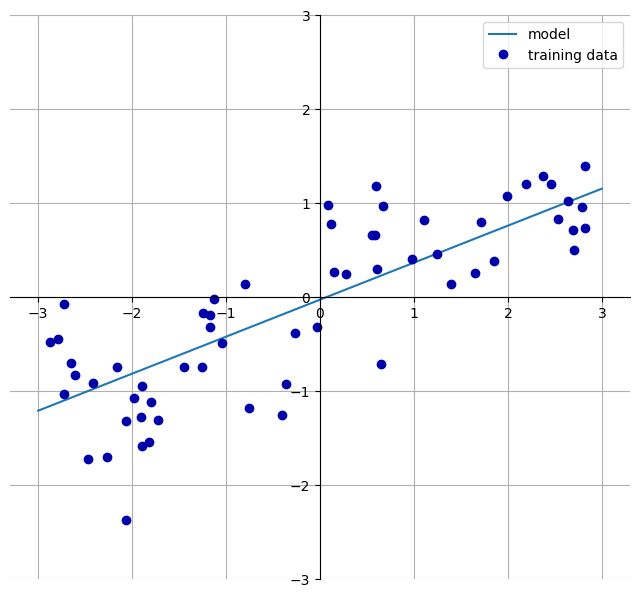

In [32]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions

There are **many different linear models for regression**. The difference between these models lies in **how the model parameters w and b are learned** from the training data, and **how model complexity** can be controlled

#### Linear Regression (aka Ordinary Least Squares)

**Linear regression, or ordinary least squares (OLS)**, is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that **minimize the mean squared error** between predictions and the true regression targets, y, on the training set.

Linear regression has no parameters

In [36]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
#Underfitting


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [39]:
# Exemple on a more complex Dataset
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
#Clear sign of overfitting

Training set score: 0.95
Test set score: 0.61


#### Ridge Regression

In ridge regression,though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an **additional constraint**. 

We also want the magnitude of coefficients to be **as small as possible**; in other words, all entries of w should be **close to zero**. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. 

This constraint is an example of what is called **regularization**. Regularization means explicitly restricting a model to avoid overfitting.

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


With linear regression, we were overfitting our data. **Ridge is a more restricted model**, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization.

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the **alpha parameter**.

Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization

Decreasing alpha allows the coefficients to be less restricte

In [43]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [45]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


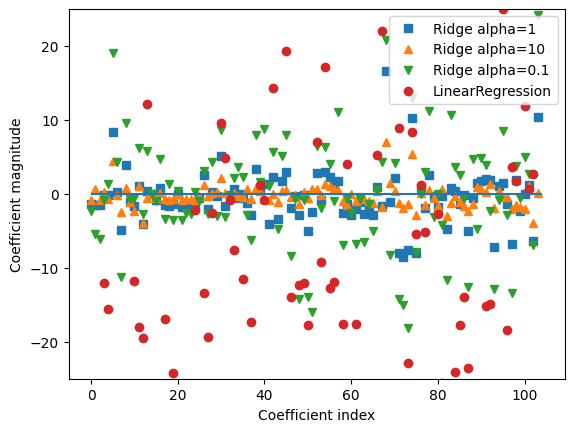

In [46]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

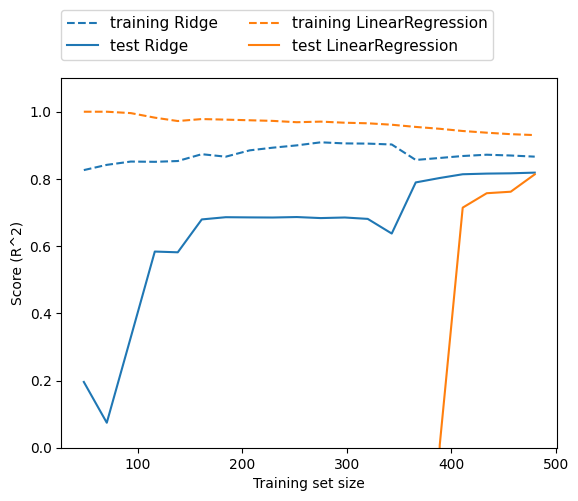

In [47]:
mglearn.plots.plot_ridge_n_samples()

With enough training data, reguralization becomes less important and given enough data, linear regression and ridge will have the same performance.

#### Lasso

As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called **L1 regularization**.

The consequence of L1 regularization
is that when using the lasso, some coefficients are **exactly zero**. This means some features
are entirely ignored by the model. This can be seen as a form of automatic feature
selection. 

Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
# Results indicate underfitting


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Similarly to Ridge, the Lasso also has a **regularization parameter, alpha**, that controls
how strongly coefficients are pushed toward zero

In [49]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [51]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
#Alpha too low similar to Linear Regression

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

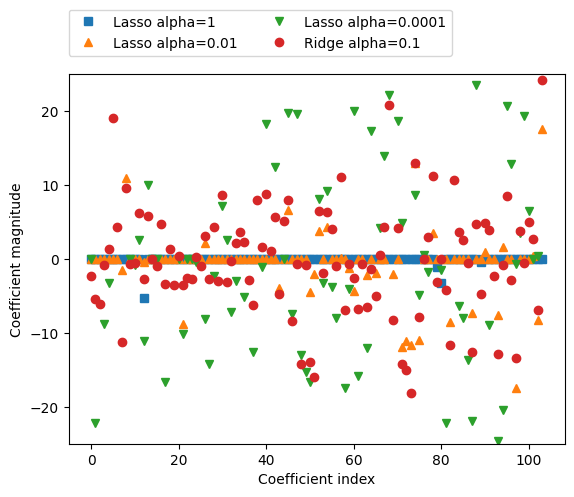

In [52]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, ridge regression is usually the first choice between these two models.

However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice.

Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features. 

scikit-learn also provides
the **ElasticNet class**, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.

### Classification

Linear models are also extensively used for **classification**

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0 (Binary Classification)

For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that **separates two classes using a line**, a plane, or a hyperplane.

The two most common linear classification algorithms are **logistic regression**,  and **linear support vector machines**

By default, both models apply an **L2 regularization**, in the same
way that Ridge does for regression.

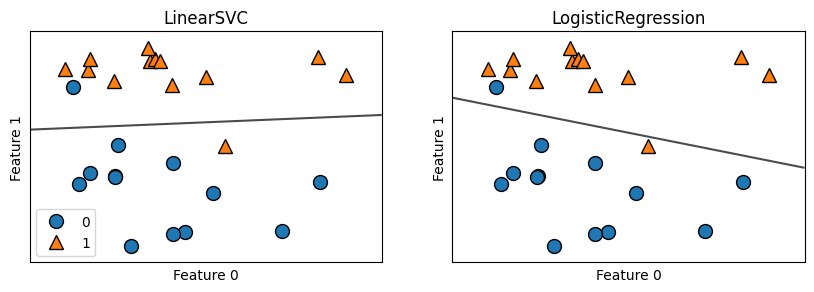

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called **C**, and higher values of C correspond to less regularization.

in high dimensions, linear models for classification become very powerful and guarding against overfitting becomes increasingly important
when considering more features

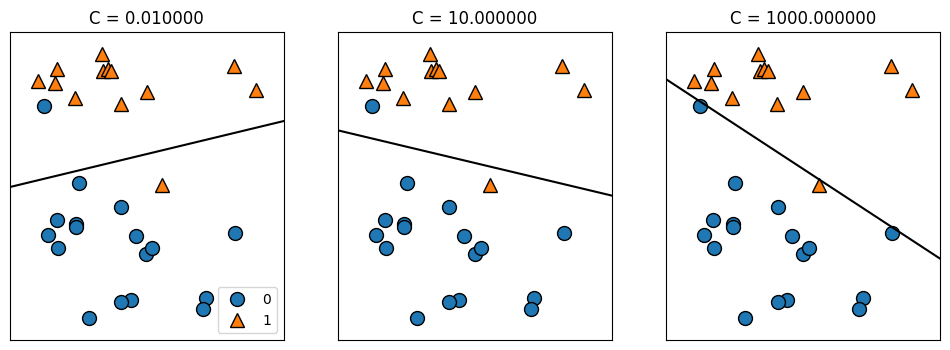

In [55]:
mglearn.plots.plot_linear_svc_regularization()

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.951


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.937


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


c:\Users\bapdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


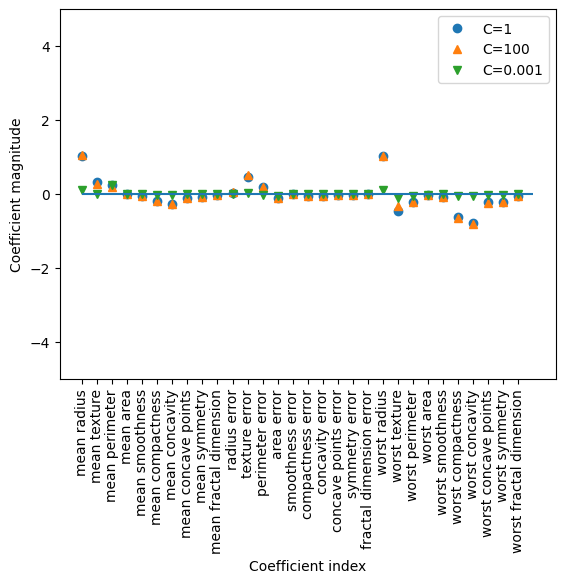

In [60]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression).

A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the **one-vs.-rest approach**. 

In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. 

To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

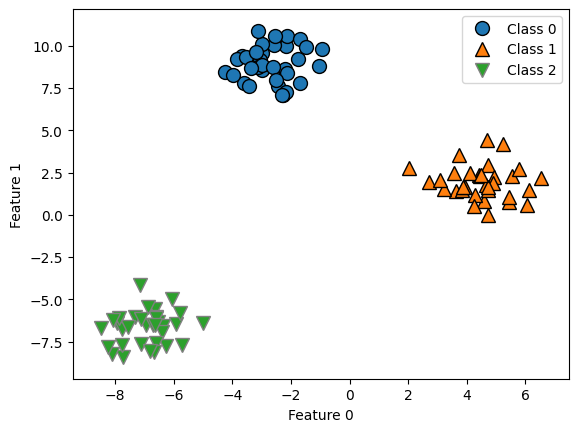

In [62]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [63]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


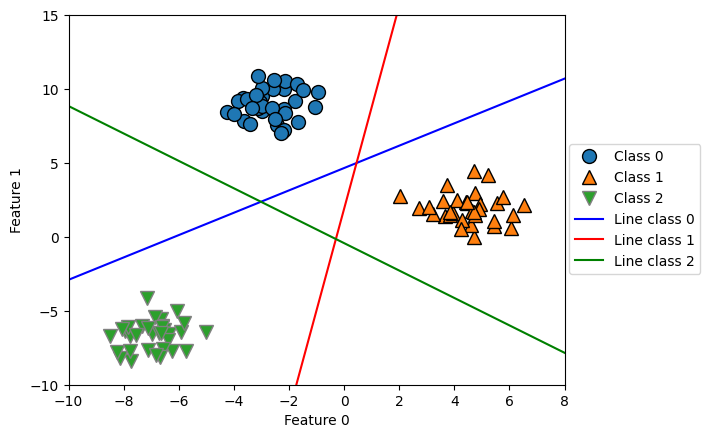

In [64]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

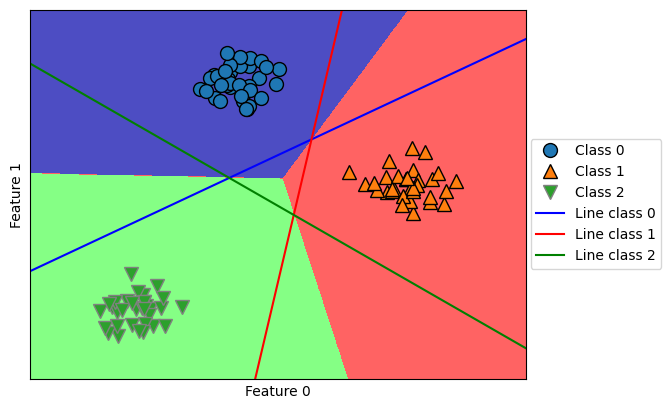

In [65]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Naive Bayes Classifiers

Quite similar to linear models but even faster in training but with worse performance.

The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature

3 types of Naive Bayes Classifiers: **GaussianNB, BernoulliNB, and MultinomialNB**

GaussianNB can be applied to
any **continuous data**, while BernoulliNB assumes **binary data** and MultinomialNB
assumes **count data** (that is, that each feature represents an integer count of something,
like how often a word appears in a sentence). BernoulliNB and MultinomialNB
are mostly used in text data classification.

The BernoulliNB classifier counts how often **every feature of each class is not zero.**

MultinomialNB takes into account the
**average value** of each feature for each class, while GaussianNB stores the **average value**
as well as the **standard deviation** of each feature for each class

To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted

In [67]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB and BernoulliNB have a single parameter, alpha, which controls
model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. 

This results in a
“smoothing” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha, meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat